# Шкарбаненко Михаил Б05-907

# Задача 4 (4.2)

Рассмотрим некоторую задачу классификации. Пусть задано качество 4 моделей a1, a2, a3, a4. Качество полученных моделей показано в [таблице](https://github.com/andriygav/PSAD/blob/master/labs/lab1/data/classifiers.csv).

Исследователю требуется выбрать наилучшую модель. Для выбора лучшей модели исследовать требуется попарно сравнить среднее значение качества всех моделей. Может ли исследователь утверждать что какая-то из моделей лучше другой?

Требуется:

* записать задачу формально;

* предложить статистику для решения данной задачи;

* записать нулевое распределение данной статистики;

* записать явно правило принятия решения на основе статистики и нулевого распределения для обеспечения уровня значимости alpha = 0.05;

* проверить гипотезу по записанному критерию, для данных из условия. Противоречат ли они гипотезе?

Все выкладки должны быть сделаны аналитически, без использования компьютера. (допускается использование компютера для подстановвки численых значений в финальную формулу)

## Решение

In [607]:
import pandas as pd
from collections import Counter
import itertools
from matplotlib import pyplot as plt
import numpy as np
import collections
import warnings

In [608]:
warnings.filterwarnings('ignore')

In [609]:
data = pd.read_csv('https://raw.githubusercontent.com/andriygav/PSAD/master/labs/lab1/data/classifiers.csv')
data

,Номер выборки,a1,a2,a3,a4
0,1,86,50,93,13
1,2,85,74,55,35
2,3,53,92,58,51
3,4,44,41,56,37
4,5,2,18,99,26
5,6,5,68,35,17


Будем попарно сравнивать выборки, используя критерий Уилкоксона-Манна-Уитни.

1. Постановка задачи:

* Нулевая гипотеза $H_0$: $F_{X_1}(x) = F_{X_2}(x)$ 

* Альтернатива $H_1$: $F_{X_1}(x) = F_{X_2}(x + \Delta)$ 

2. Статистика: 

$$X_{(n_1)} \leq \dots \leq X_{(n_1 + n_2)}$$

$$X = X_1^{n_1} \cup X_2^{n_2}$$

$$R(X_1^{n_1}, X_2^{n_2}) = \sum\limits_{i=1}^{n_1}rank(X_1^{i})$$

3. Нулевое распределние статистики табличное. Рассчитывается перебором различных комбинаций рангов элементов выборки $X_1$ в общем вариационном ряду.

4. Модификация уровня значимости методом Бенджамини-Хохберга: $\alpha_i = \frac{\alpha i}{6}$, где $i \in \overline{1,6}$.

5. Пусть $r$ - значение статистики, тогда $H_0$ отвергается $\iff$ $r \notin [R_{\frac{\alpha^*}{2}}, R_{\frac{1-\alpha^*}{2}}]$.

Все рассчеты произведены без использования сторонних библиотек по статитистическому анализу и реализованных методов/критериев.

In [610]:
def calc_r(x1, x2):
    union = np.concatenate((x1, x2))
    union.sort()
    res = 0
    for v1 in x1:
        res += 1
        for v in union:
            res += int(v1 > v)
    return res

def calc_pvalue(sum_cum_probs, r): 
    pvalue = 2 * min(sum_cum_probs[r], 1 - sum_cum_probs[r])
    return pvalue

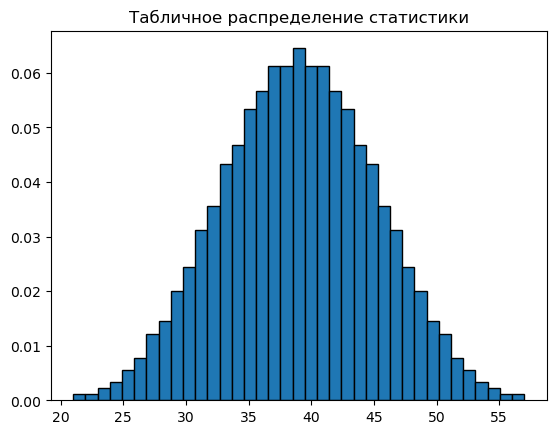

In [611]:
m, alpha_0 = 6, 0.05
ranks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
all_subsets = itertools.combinations(ranks, 6)
sums = np.array([sum(s) for s in all_subsets])

sums_count = Counter(sums)
sums_probs = {}
norm_coeff = sum(sums_count.values())
for c in count:
    sums_probs[c] = (sums_count[c]/norm_coeff)

sums_cum_probs = {}
sums_cum_probs_list = np.cumsum(list(sums_probs.values()))
sums_cum_probs_list
for i, val in enumerate(sums_probs):
    sums_cum_probs[val] = sums_cum_probs_list[i]

plt.hist(sums, bins=len(set(sums)), edgecolor="black", density=True)
plt.title('Табличное распределение статистики')
plt.show()

In [612]:
cnt = 0
sample_dict = {}
for i in range(1, 4):
    for j in range(i+1, 5):
        cnt += 1
        alpha = alpha_0 * cnt / m
        ai, aj = 'a' + str(i), 'a' + str(j)
        r = calc_r(data[ai].to_numpy(), data[aj].to_numpy())
        pvalue = calc_pvalue(sums_cum_probs, r)
        sample_dict[ai+' '+aj] = round(pvalue, 4)
sample_dict = dict(sorted(sample_dict.items(), key=lambda item: item[1]))

for i, (a, p) in enumerate(sample_dict.items()):
    modif_alpha = alpha * (i + 1) / m
    print('Выборки: ({})   Уровень значимости: {}   p-value: {}'.format(a, modif_alpha, p))


Выборки: (a3 a4)   Уровень значимости: 0.008333333333333335   p-value: 0.0087
Выборки: (a2 a4)   Уровень значимости: 0.01666666666666667   p-value: 0.0411
Выборки: (a1 a3)   Уровень значимости: 0.025000000000000005   p-value: 0.2403
Выборки: (a1 a4)   Уровень значимости: 0.03333333333333334   p-value: 0.3939
Выборки: (a2 a3)   Уровень значимости: 0.04166666666666668   p-value: 0.5887
Выборки: (a1 a2)   Уровень значимости: 0.05000000000000001   p-value: 0.6991


### Вывод

Ни для одной из пар выборок нельзя отклонить гипотезу о равенстве среднего качества моделей. Наиболее близка к отклонению пара (a1, a3). Я попробовал все методы множественной правки гипотез, но везде не хватает буквально нескольколько десятитысячных для отклонения гипотезы.